In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error

import itertools


# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("daily-min-temperatures.xls",parse_dates = ['Date'],index_col = 'Date')
df

,Temp
Date,
1981-01-01,20.7
1981-01-02,17.9
1981-01-03,18.8
1981-01-04,14.6
1981-01-05,15.8
...,...
1990-12-27,14.0
1990-12-28,13.6
1990-12-29,13.5


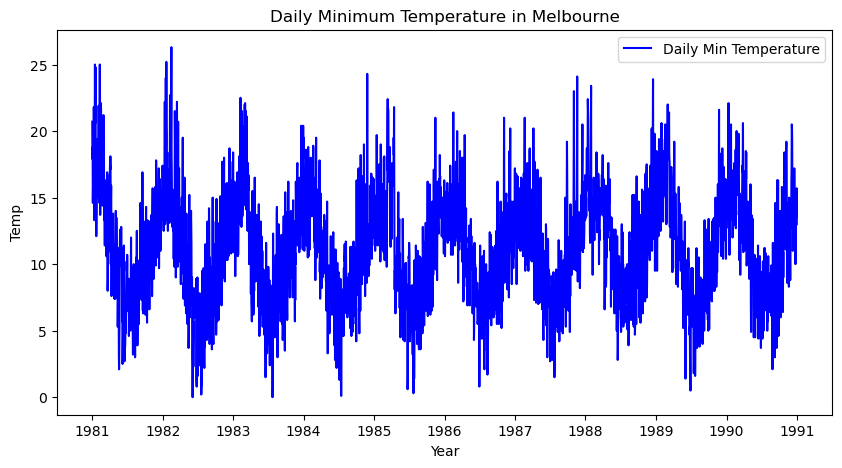

In [5]:
# plot the times series
plt.figure(figsize = (10,5))
plt.plot(df,label = 'Daily Min Temperature',color = 'blue')
plt.xlabel("Year")
plt.ylabel("Temp")
plt.title("Daily Minimum Temperature in Melbourne")
plt.legend()
plt.show()

In [6]:
# Split data into training and test sets

train_size = int(len(df)*0.8)
train,test = df.iloc[:train_size],df.iloc[train_size:]

In [7]:
# Define range of ARIMA parameter

p_values = range(0,4)
d_values = range(0,3)
q_values = range(0,4)

best_rmse, best_cfg = float("inf"), None

In [12]:
# # Perform Grid Search

# for p,d,q in itertools.product(p_values,d_values,q_values):
#     try:
#         model = ARIMA(train,order = (p,d,q))
#         model_fit = model.fit()
#         predictions = model_fit(forecast(steps = len(test))
#         rmse = sqrt(mean_squared_error(test,predictions))
                                
#         if rmse < best_rmse:
#             best_rmse, best_cfg = rmse, (p,d,q)
                                
#         print(f"ARIMA{(p,d,q)} - RMSE : {rmse:.4f}")
                                
                                
#         except:
#             continue
                                
#  print best model


In [13]:
import itertools
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# Define parameter ranges
p_values = range(0, 3)
d_values = range(0, 2)
q_values = range(0, 3)

best_rmse = float("inf")
best_cfg = None

# Perform Grid Search
for p, d, q in itertools.product(p_values, d_values, q_values):
    try:
        model = ARIMA(train, order=(p, d, q))
        model_fit = model.fit()
        
        predictions = model_fit.forecast(steps=len(test))
        rmse = sqrt(mean_squared_error(test, predictions))
        
        if rmse < best_rmse:
            best_rmse, best_cfg = rmse, (p, d, q)
        
        print(f"ARIMA{(p, d, q)} - RMSE: {rmse:.4f}")
        
    except:
        continue

# Print best model
print(f"\nBest ARIMA configuration: ARIMA{best_cfg} with RMSE: {best_rmse:.4f}")

ARIMA(0, 0, 0) - RMSE: 4.1196
ARIMA(0, 0, 1) - RMSE: 4.1190
ARIMA(0, 0, 2) - RMSE: 4.1170
ARIMA(0, 1, 0) - RMSE: 4.8765
ARIMA(0, 1, 1) - RMSE: 4.8007
ARIMA(0, 1, 2) - RMSE: 5.2312
ARIMA(1, 0, 0) - RMSE: 4.1074
ARIMA(1, 0, 1) - RMSE: 4.0995
ARIMA(1, 0, 2) - RMSE: 3.9874
ARIMA(1, 1, 0) - RMSE: 4.9366
ARIMA(1, 1, 1) - RMSE: 5.2695
ARIMA(1, 1, 2) - RMSE: 5.2753
ARIMA(2, 0, 0) - RMSE: 4.1051
ARIMA(2, 0, 1) - RMSE: 4.0406
ARIMA(2, 0, 2) - RMSE: 4.0284
ARIMA(2, 1, 0) - RMSE: 4.8225
ARIMA(2, 1, 1) - RMSE: 5.2765
ARIMA(2, 1, 2) - RMSE: 5.2764

Best ARIMA configuration: ARIMA(1, 0, 2) with RMSE: 3.9874


In [15]:
# fit the best model on full dataset

best_p, best_d, best_q = best_cfg
final_model = ARIMA(df, order = (best_p, best_d,best_q))
final_model_fit = final_model.fit()

In [16]:
final_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                   Temp   No. Observations:                 3650
Model:                 ARIMA(1, 0, 2)   Log Likelihood               -8403.185
Date:                Fri, 04 Apr 2025   AIC                          16816.370
Time:                        14:33:40   BIC                          16847.383
Sample:                             0   HQIC                         16827.415
                               - 3650                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.4262      0.743     15.371      0.000       9.969      12.883
ar.L1          0.9908      0.003    391.171      0.000       0.986       0.996
ma.L1         -0.4374      0.015    -29.544      0.000      -0.466      -0.408
ma.L2         -0.3784      0.015    -24.686      0.000      -0.408      -0.348
sigma2         5.8481      0.130     44.927      0.000       5.593       6.103
===================================================================================
Ljung-Box (L1) (Q):                   5.25   Jarque-Bera (JB):                15.17
Prob(Q):                              0.02   Prob(JB):                         0.00
Heteroskedasticity (H):               0.87   Skew:                             0.10
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [17]:
# Forecast future values (next 30 days)

future_predictions = final_model_fit.forecast(steps = 360)

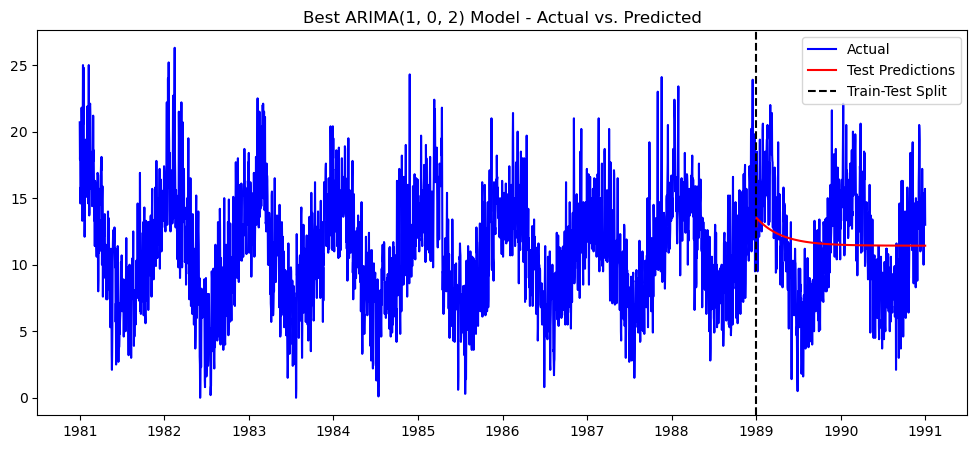

In [18]:
# plot actual vs predicted values

plt.figure(figsize = (12,5))

plt.plot(df, label = 'Actual',color = 'blue')
plt.plot(test.index, final_model_fit.forecast(steps = len(test)), label = 'Test Predictions',color ='Red')
plt.axvline(x = test.index[0],linestyle = "--",color = 'black',label = 'Train-Test Split')
plt.title(f"Best ARIMA{best_cfg} Model - Actual vs. Predicted")
plt.legend()
plt.show()

In [44]:
int(2**0.5) +1 

2

In [25]:
s1 = "Hello"
s2 = "World"
s3 = "listen"
s4 = "silent"

print(sorted(s1))
print(sorted(s2))
print(sorted(s3))
print(sorted(s4))

['H', 'e', 'l', 'l', 'o']
['W', 'd', 'l', 'o', 'r']
['e', 'i', 'l', 'n', 's', 't']
['e', 'i', 'l', 'n', 's', 't']


In [33]:
s = input("Please Enter the text ... ")

if s[::-1] == s:
    print("It's Palindrome")
else:
    print("Not")

Please Enter the text ... yaha
Not


In [34]:
def merge_sorted_lists(l1, l2):
    i, j = 0, 0
    result = []
    while i < len(l1) and j < len(l2):
        if l1[i] < l2[j]:
            result.append(l1[i])
            i += 1
        else:
            result.append(l2[j])
            j += 1
    result.extend(l1[i:])
    result.extend(l2[j:])
    return result

# Example
print(merge_sorted_lists([1, 3, 5], [2, 4, 6]))  # Output: [1, 2, 3, 4, 5, 6]

[1, 2, 3, 4, 5, 6]


In [36]:
len([1, 3, 5])

3

In [37]:
len([2,4,6])

3

In [40]:
2 < 3

True

In [43]:
from collections import Counter

text = "Bhaskar"
count = Counter(text)
print(count)


Counter({'a': 2, 'B': 1, 'h': 1, 's': 1, 'k': 1, 'r': 1})
